### 使用TensorFlow 辨識手寫數字

In [1]:
! pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/e8/df/d606d07cff0fc8d22abcc54006c0247002d11a7f2d218eb008d48e76851d/protobuf-3.6.1-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/35/6b/11530768cac581a12952a2aad00e1526b89d242d0b9f59534ef6e6a1752f/astor-0.7.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f0/90/520757ccafb14f03e8e46a54bacd45f5f9cca6b96b58b83b66a272f059df/grpcio-1.16.0-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/fc/94/74e0fa783d3fc07e41715973435dd051ca89c550881b3454233c39c73e69/Keras_Preprocessing-1.0.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3f/c4/2ff40221029f7098d58f8d7fb99b97e8100f3293f9856f0fb5834bef100b/Keras_Applications-1.0.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7a/6b/5600647404ba15545ec37d2f7f58844d690baf2f81f3a60b862e48f29287/Markdown-3.0.1-py2.py3-none-any.whl


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:\\Users\\USER", one_hot=True)

C:\ProgramData\Anaconda3_2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\USER\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\USER\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting C:\Users\USER\t10k-images-idx3-ubyte.gz
Extracting C:\Users\USER\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000000DB7A358>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000100BF3C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000000F573400>)

In [4]:
print(dir(mnist))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_fields', '_make', '_replace', '_source', 'count', 'index', 'test', 'train', 'validation']


In [5]:
print(dir(mnist.train))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_epochs_completed', '_images', '_index_in_epoch', '_labels', '_num_examples', 'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples']


In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
sample_image = mnist.train.images[0].reshape((28,28))

Populating the interactive namespace from numpy and matplotlib


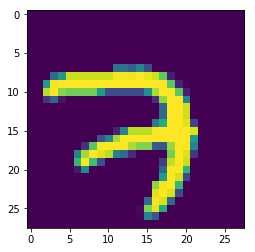

In [9]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(sample_image)

In [10]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### 設定網路參數

In [11]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

In [12]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

### Placeholders

In [13]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### 建構多層神經網路

In [14]:
def multilayer_perceptron(x, weights, biases):  
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [15]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [16]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### 建立模型

In [17]:
pred = multilayer_perceptron(x, weights, biases)

### 設定代價函數

In [18]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### 初始化變量

In [19]:
init = tf.global_variables_initializer()

### 訓練模型

In [20]:
Xsamp,ysamp = mnist.train.next_batch(100)

In [21]:
Xsamp.shape

(100, 784)

In [22]:
ysamp.shape

(100, 10)

In [23]:
Xsamp,ysamp = mnist.train.next_batch(1)

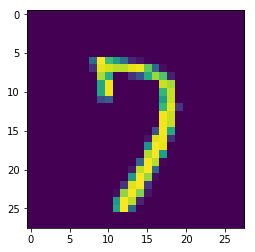

In [24]:

sample_image = Xsamp.reshape((28,28))
plt.imshow(sample_image)

In [25]:
ysamp

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

### 評估模型

In [26]:
y

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

In [27]:
pred

<tf.Tensor 'add_2:0' shape=(?, 10) dtype=float32>

In [28]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [29]:
correct_predictions

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [30]:
correct_predictions = tf.cast(correct_predictions, "float")

In [31]:
accuracy = tf.reduce_mean(correct_predictions)

In [32]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [33]:
# Start the session
with tf.Session() as sess:
    
    # Intialize all the variables
    sess.run(init)

    for epoch in range(training_epochs):

        # Initial the cost = 0.0
        avg_cost = 0.0

        total_batch = int(n_samples/batch_size)

        for i in range(total_batch):

            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

            # Compute average loss
            avg_cost += c / total_batch

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))
    print(accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=162.7127539617364
Epoch: 2 cost=60.175241857008494
Epoch: 3 cost=43.90214457815342
Epoch: 4 cost=35.39966048847546
Epoch: 5 cost=29.56505994363263
Epoch: 6 cost=25.65166115305641
Epoch: 7 cost=22.703955215974272
Epoch: 8 cost=20.195572472919114
Epoch: 9 cost=18.367894876870228
Epoch: 10 cost=16.83057081796907
Epoch: 11 cost=15.625885284163736
Epoch: 12 cost=14.391746202978243
Epoch: 13 cost=13.504779600988734
Epoch: 14 cost=12.501692919216358
Epoch: 15 cost=11.818564327512256
0.9095
Training Completed in 15 Epochs


## TensorBoard

In [6]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:\\Users\\USER", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\USER\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:\Users\USER\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting C:\Users\USER\t10k-images-idx3-ubyte.gz
Extracting C:\Users\USER\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [34]:
learning_rate   = 0.001
training_epochs = 15
batch_size      = 100

n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 
n_samples  = mnist.train.num_examples

In [35]:
with tf.name_scope('inputs'):
    x = tf.placeholder("float", [None, n_input],   name= 'input_x')
    y = tf.placeholder("float", [None, n_classes], name= 'input_y')

In [36]:
with tf.name_scope('input_reshape'):
    image_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input', image_input, 10)

In [37]:
def add_layer(x, input_tensors, output_tensors, layer_name, activation_function = None):  
    with tf.name_scope('Layer'):
        with tf.name_scope('Weights'):
            weight = tf.Variable(tf.random_normal([input_tensors, output_tensors]), name = 'w')
            tf.summary.histogram(name = layer_name + '/Weights', values = weight)
        with tf.name_scope('Bias'):
            bias = tf.Variable(tf.random_normal([output_tensors]), name= 'b')
            tf.summary.histogram(name = layer_name + '/Bias', values = bias)
        with tf.name_scope('Wx_plus_b'):
            formula = tf.add(tf.matmul(x, weight), bias)
        if activation_function is None:
            outputs = formula
        else:
            outputs = activation_function(formula)
        tf.summary.histogram(name = layer_name + '/Outputs', values = outputs)
        return outputs

In [38]:
layer1 = add_layer(x, input_tensors = n_input, output_tensors = n_hidden_1, layer_name='layer1',activation_function = tf.nn.relu)
layer2 = add_layer(layer1, input_tensors = n_hidden_1, output_tensors = n_hidden_2, layer_name='layer2',activation_function = tf.nn.relu)
out_layer = add_layer(layer2, input_tensors = n_hidden_2, output_tensors = n_classes, layer_name='out_layer',activation_function = None)

In [39]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=y))
    tf.summary.scalar('loss', cost)
    
with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    acc = tf.equal(tf.argmax(out_layer, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    tf.summary.scalar("accuracy", acc)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [40]:
init = tf.global_variables_initializer()

In [41]:
merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)

    ## Merge Summary
    
    writer = tf.summary.FileWriter("tensorboard2/", graph = sess.graph)

    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_samples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c, result = sess.run([optimizer, cost, merged], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            ## Adding summary of each step
            writer.add_summary(result,  epoch * total_batch + i)

        print("Epoch: {} cost={}".format(epoch+1,avg_cost))

    print("Training Completed in {} Epochs".format(training_epochs))

Epoch: 1 cost=166.012001093084
Epoch: 2 cost=60.311729944402494
Epoch: 3 cost=43.98361761613327
Epoch: 4 cost=35.427545705275094
Epoch: 5 cost=29.88471435243432
Epoch: 6 cost=26.094324928196983
Epoch: 7 cost=23.083716003244568
Epoch: 8 cost=20.779412655613665
Epoch: 9 cost=18.91421560352501
Epoch: 10 cost=17.25629793123767
Epoch: 11 cost=15.885236131277953
Epoch: 12 cost=14.752916832620437
Epoch: 13 cost=13.687327390909202
Epoch: 14 cost=12.788714196085936
Epoch: 15 cost=12.0156517796083
Training Completed in 15 Epochs


## Tensorboard
- tensorboard --logdir tensorboard/ --host 127.0.0.1
- http://127.0.0.1:6006/

## Keras

In [42]:
! pip install keras

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [43]:
import keras

Using TensorFlow backend.


In [44]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [60]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [61]:
x_train.shape

(60000, 28, 28)

In [62]:
y_train.shape

(60000,)

In [63]:
y_train[0]

5

In [64]:
x_test.shape

(10000, 28, 28)

In [65]:
#x_train[0]

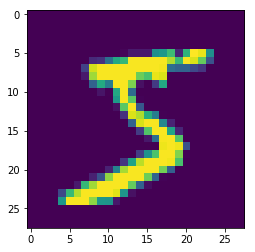

In [66]:
plt.imshow(x_train[0])

In [67]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)

In [68]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [70]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [71]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [73]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 設定網路參數

In [ ]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建構神經網路

In [74]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [75]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [76]:
## Dense = activation_function(X * Weight + Bias)

### 訓練神經網路

In [77]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 34us/step - loss: 1.0372 - acc: 0.7613 - val_loss: 0.4770 - val_acc: 0.8814
Epoch 2/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.4166 - acc: 0.8891 - val_loss: 0.3480 - val_acc: 0.9003
Epoch 3/15
60000/60000 [==============================] - 2s 34us/step - loss: 0.3397 - acc: 0.9055 - val_loss: 0.3041 - val_acc: 0.9123
Epoch 4/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.3033 - acc: 0.9141 - val_loss: 0.2776 - val_acc: 0.9201
Epoch 5/15
60000/60000 [==============================] - 2s 31us/step - loss: 0.2788 - acc: 0.9208 - val_loss: 0.2588 - val_acc: 0.9247
Epoch 6/15
60000/60000 [==============================] - 2s 31us/step - loss: 0.2598 - acc: 0.9258 - val_loss: 0.2429 - val_acc: 0.9307
Epoch 7/15
60000/60000 [==============================] - 2s 31us/step - loss: 0.2437 - acc: 0.9307 - val_loss: 0.2337 - val_acc

In [80]:
predicted = np.argmax(model.predict(x_test), 1)

In [82]:
y = np.argmax(y_test, 1)

In [83]:
predicted == y

array([ True,  True,  True, ...,  True,  True,  True])

In [85]:
sum(predicted == y)  / len(y)

0.9506

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y, predicted)

0.9506

In [88]:
confusion_matrix(y, predicted)

array([[ 965,    0,    0,    1,    0,    5,    5,    1,    2,    1],
       [   0, 1115,    2,    2,    1,    1,    3,    2,    9,    0],
       [   8,    3,  966,   10,    4,    4,    9,   10,   15,    3],
       [   1,    1,    9,  960,    0,   16,    1,   10,    9,    3],
       [   1,    1,    4,    1,  936,    0,    8,    3,    5,   23],
       [  10,    2,    0,   14,    4,  836,   10,    1,   10,    5],
       [   8,    3,    4,    1,   11,   12,  917,    0,    2,    0],
       [   2,   10,   21,    7,    3,    1,    0,  960,    3,   21],
       [   3,    3,    4,   16,    8,    8,   10,    7,  910,    5],
       [   6,    8,    1,    9,   24,    5,    1,    8,    6,  941]],
      dtype=int64)

## 客戶流失分析

In [92]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/customer_churn.csv', index_col=0)

In [94]:
dataset.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [96]:
# df[ row , col  ]
X = dataset.iloc[:,3:]

In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 17 columns):
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls                 3333 non-null int64
total_intl_charge                3333 non-null float64
number_customer_service_calls    3333 non-null int64
churn                      

In [100]:
X['international_plan'] = X['international_plan'].map(lambda e : 1 if e == 'yes' else 0) 

In [102]:
X['voice_mail_plan'] = X['voice_mail_plan'].map(lambda e : 1 if e == 'yes' else 0) 

In [103]:
X['churn'] = X['churn'].map(lambda e : 1 if e == 'yes' else 0) 

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 17 columns):
international_plan               3333 non-null int64
voice_mail_plan                  3333 non-null int64
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls                 3333 non-null int64
total_intl_charge                3333 non-null float64
number_customer_service_calls    3333 non-null int64
churn                        

In [106]:
y = X['churn']

In [107]:
del X['churn']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [110]:
X_train.shape

(2666, 16)

In [112]:
X_test.shape

(667, 16)

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [115]:
X_test

array([[ 3.11557817, -0.61579486, -0.58944097, ...,  0.21418988,
        -0.33633574, -1.17967998],
       [-0.32096771,  1.62391742,  2.06354095, ..., -0.60566687,
        -0.08616319,  0.33819011],
       [-0.32096771, -0.61579486, -0.58944097, ..., -0.19573849,
         0.8091912 ,  1.09712515],
       ...,
       [-0.32096771, -0.61579486, -0.58944097, ..., -0.60566687,
         0.55901865, -0.42074493],
       [ 3.11557817, -0.61579486, -0.58944097, ..., -1.42552363,
        -0.83668084, -0.42074493],
       [-0.32096771, -0.61579486, -0.58944097, ..., -0.19573849,
        -0.29683481,  1.09712515]])

### 設定網路參數

In [122]:
n_hidden_1 = 8 
n_hidden_2 = 8 
n_input    = 16 
n_classes  = 1 

training_epochs = 100
batch_size = 100

### 建構神經網路

In [123]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='sigmoid'))

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = batch_size, epochs = training_epochs,validation_data=(X_test, y_test))

Train on 2666 samples, validate on 667 samples
Epoch 1/100
2666/2666 [==============================] - 0s 79us/step - loss: 0.8837 - acc: 0.3286 - val_loss: 0.7360 - val_acc: 0.5337
Epoch 2/100
2666/2666 [==============================] - 0s 9us/step - loss: 0.6401 - acc: 0.6887 - val_loss: 0.5800 - val_acc: 0.7751
Epoch 3/100
2666/2666 [==============================] - 0s 9us/step - loss: 0.5387 - acc: 0.8256 - val_loss: 0.5078 - val_acc: 0.8411
Epoch 4/100
2666/2666 [==============================] - 0s 8us/step - loss: 0.4897 - acc: 0.8500 - val_loss: 0.4692 - val_acc: 0.8561
Epoch 5/100
2666/2666 [==============================] - 0s 8us/step - loss: 0.4630 - acc: 0.8548 - val_loss: 0.4472 - val_acc: 0.8681
Epoch 6/100
2666/2666 [==============================] - 0s 8us/step - loss: 0.4473 - acc: 0.8545 - val_loss: 0.4329 - val_acc: 0.8681
Epoch 7/100
2666/2666 [==============================] - 0s 9us/step - loss: 0.4369 - acc: 0.8530 - val_loss: 0.4230 - val_acc: 0.8696
Epoch 8

Epoch 61/100
2666/2666 [==============================] - 0s 9us/step - loss: 0.3156 - acc: 0.8811 - val_loss: 0.3055 - val_acc: 0.8846
Epoch 62/100
2666/2666 [==============================] - 0s 8us/step - loss: 0.3141 - acc: 0.8826 - val_loss: 0.3041 - val_acc: 0.8846
Epoch 63/100
2666/2666 [==============================] - 0s 8us/step - loss: 0.3126 - acc: 0.8837 - val_loss: 0.3028 - val_acc: 0.8861
Epoch 64/100
2666/2666 [==============================] - 0s 8us/step - loss: 0.3111 - acc: 0.8841 - val_loss: 0.3016 - val_acc: 0.8861
Epoch 65/100
2666/2666 [==============================] - 0s 7us/step - loss: 0.3096 - acc: 0.8848 - val_loss: 0.3004 - val_acc: 0.8846
Epoch 66/100
2666/2666 [==============================] - 0s 7us/step - loss: 0.3081 - acc: 0.8848 - val_loss: 0.2993 - val_acc: 0.8861
Epoch 67/100
2666/2666 [==============================] - 0s 8us/step - loss: 0.3066 - acc: 0.8852 - val_loss: 0.2982 - val_acc: 0.8876
Epoch 68/100
2666/2666 [========================

In [127]:
predicted = (model.predict(X_test) > 0.5).flatten()

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, predicted)

0.9085457271364318

In [130]:
confusion_matrix(y_test, predicted)

array([[563,  16],
       [ 45,  43]], dtype=int64)

In [131]:
# TP: True Positive
# FP: False Positive
# FN: False Negative
# TN: True Negative
#[TP:563,  FP:16],
#[FN:45,  TN:43]
#https://image.slidesharecdn.com/qmethodsday14-2014-141013122633-conversion-gate02/95/quantitative-methods-for-lawyers-class-14-power-laws-hypothesis-testing-statistical-significance-professor-daniel-martin-katz-22-638.jpg?cb=1448049863

In [ ]:
#-20000 * (16 + 43 )
#-2000 * (45 + 43)

## 客戶流失數據分析二

In [132]:
import pandas
dataset = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv')

In [135]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [138]:
X = dataset.iloc[:,3:-1]

In [140]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [141]:
y = dataset['Exited']

In [142]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.3+ KB


In [147]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [149]:
geo = pd.get_dummies(X['Geography'])

In [152]:
X = pd.concat([X,geo], axis = 1)
del X['Spain']
del X['Geography']

In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
France             10000 non-null uint8
Germany            10000 non-null uint8
dtypes: float64(2), int64(6), object(1), uint8(2)
memory usage: 722.7+ KB


In [153]:
X['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [155]:
X['Gender'] = X['Gender'].map(lambda e: 1 if e =='Male' else 0 )

In [156]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0
